In [1]:
import pandas as pd
from google.colab import files
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

uploaded = files.upload()
data = pd.read_excel("Course_PCA.xlsx")

df = pd.DataFrame(data)

Saving Course_PCA.xlsx to Course_PCA.xlsx


In [2]:
df

,Course,Fac1,Fac2,Fac3
0,OOP I,0.18648,0.12844,-0.57182
1,Database Systems,1.01604,-0.10518,0.02793
2,Data Structures,0.71121,1.54508,-0.05019
3,OS,0.73713,1.13244,0.21191
4,OOP II,0.44529,1.17826,-1.14021
...,...,...,...,...
495,Comp Architecture,-0.36990,0.13004,1.36196
496,Comp Networks,-0.43899,-0.15407,0.88817
497,Software Eng I,-0.50848,-1.10414,0.65743
498,Theory of Comp,-0.54589,-0.03350,1.37975


In [3]:
grouped = df.groupby('Course')
mean_data = grouped.mean()
courses = df['Course'].unique()
mean_data = mean_data.loc[courses]

In [4]:
mean_data

,Fac1,Fac2,Fac3
Course,,,
OOP I,0.337048,-0.149157,-0.853336
Database Systems,1.117126,-0.646051,-0.036186
Data Structures,1.077833,0.403977,-0.383122
OS,0.723510,0.663443,0.668719
OOP II,0.781098,0.330336,-1.456001
Comp Architecture,-0.423365,0.499022,1.245768
Comp Networks,-0.301439,-0.549877,0.657948
Software Eng I,-0.454878,-0.853007,0.443579
Theory of Comp,-0.608472,0.680993,1.133818


In [5]:
factor1 = mean_data['Fac1'].values
factor2 = mean_data['Fac2'].values
factor3 = mean_data['Fac3'].values

print("\nMean values of Fac1:", factor1)
print("\nMean values of Fac2:", factor2)
print("\nMean values of Fac3:", factor3)


Mean values of Fac1: [ 0.337048   1.1171258  1.0778332  0.7235102  0.7810978 -0.4233648
 -0.301439  -0.4548776 -0.6084716 -2.2484632]

Mean values of Fac2: [-0.1491566 -0.6460514  0.4039768  0.6634426  0.3303356  0.4990222
 -0.549877  -0.8530066  0.6809934 -0.3796776]

Mean values of Fac3: [-0.8533364 -0.0361858 -0.3831218  0.6687194 -1.4560014  1.2457676
  0.6579476  0.4435788  1.133818  -1.4211886]


Merge Step 1: Cluster distance = 0.2826849093528694
Merge Step 2: Cluster distance = 0.4017274458878307
Merge Step 3: Cluster distance = 0.8889871185601511
Merge Step 4: Cluster distance = 1.1065566941219054
Merge Step 5: Cluster distance = 1.4267918462175857
Merge Step 6: Cluster distance = 2.0233674749646275
Merge Step 7: Cluster distance = 2.0470362425049196
Merge Step 8: Cluster distance = 3.7096418155396993
Merge Step 9: Cluster distance = 4.089070047380176


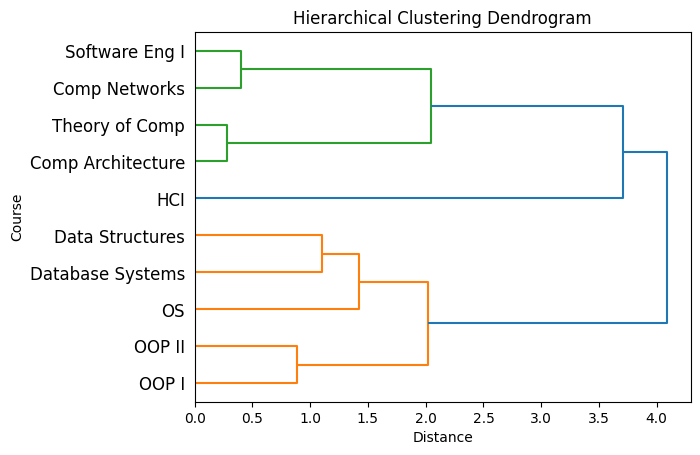

In [6]:
data = list(zip(factor1, factor2, factor3))

labels = df['Course'].values[:len(data)]

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data, labels=labels, orientation='right')

cluster_distances = linkage_data[:, 2]

# Print distances at each merge step
for i, distance in enumerate(cluster_distances):
    print(f'Merge Step {i+1}: Cluster distance = {distance}')

plt.xlabel('Distance')
plt.ylabel('Course')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()